# Clasificación

Un notebook para explicar con Python el problema de la clasificación.
Empezamos por importar las librerías que usaremos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Paso 1**
Generamos 2 grupos de datos. 

In [2]:
# Clase 0
n0 = 100
mean0 = -3
x0 = np.random.normal(mean0, 1, n0)
y0 = np.random.normal(mean0, 1, n0)

# Clase 1
n1 = 100
mean1 = 3
x1 = np.random.normal(mean1, 1, n1)
y1 = np.random.normal(mean1, 1, n1)


Pintamos nuestros datos para entenderlos mejor

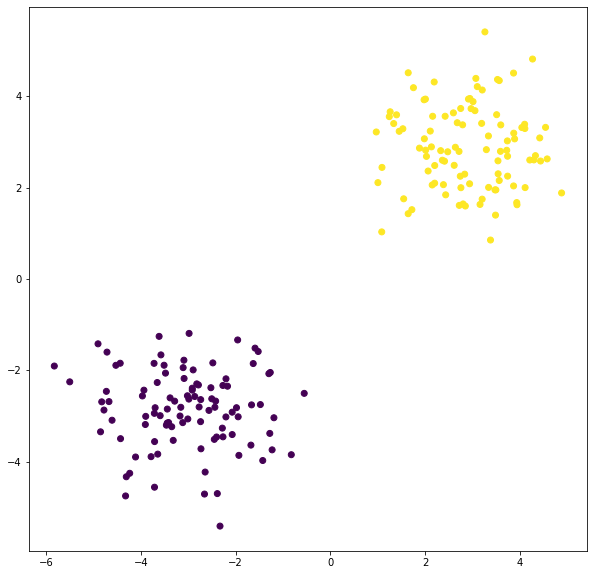

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(np.concatenate((x0, x1), 0), np.concatenate((y0, y1), 0), c=[0] * n0 + [1] * n1)
#plt.scatter([1, 2, 3, 4], [2, 4, 6, 8], c = [0, 0])
plt.show()

Antes de continuar, observe que en python, tenemos varias formas de definir "arreglos". Una de ellas es usando listas nativas y la otra es usando arreglos de numpy. Aunque las 2 sirven para guardar vectores o matrices, debe tener cuidado porque las operaciones básica entre elementos de esos 2 tipos son bien diferentes. Considere el siguiente ejemplo, donde se definen 4 vectores cada uno con 2 elementos, y vea el efecto que tienen las operaciones algebráicas sobre ellos:

In [5]:
# Python list vs Numpy array
l1 = [1, 2]
l2 = [3, 2]
print(l1 * 4) 
print(l1 + l2) 
print(l1)

a1 = np.array([1, 2])
a2 = np.array([3, 4])

print(a1 * 2)
print(a1 + a2)

[1, 2, 1, 2, 1, 2, 1, 2]
[1, 2, 3, 2]
[1, 2]
[2 4]
[4 6]


Note que el operador **+** sobre arreglos de numpy, simplemente suma los elementos de los arreglos, pero el mismo operador sobre listas de python, da como resultado la concatenación de las listas. Si quiere concatenar arreglos de numpy, debe usar la función de **concatenate**. Para entenderla mire el siguiente código:

In [6]:
a1 = np.array([[1, 2], 
               [3, 4]]) # Creamos un vector unidimensional
a2 = np.array([[5, 6], 
               [7, 8]]) # Creamos un vector unidimensional

print("Concatenación vertical, o por filas o en la primera dimensión")
print(np.concatenate((a1, a2), 0))

print("Concatenación horizontal, o por columnas o en la segunda dimensión")
print(np.concatenate((a1, a2), 1))

Concatenación vertical, o por filas o en la primera dimensión
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
Concatenación horizontal, o por columnas o en la segunda dimensión
[[1 2 5 6]
 [3 4 7 8]]


In [8]:
# Un a hipermatriz
ha = np.array([[a1, a2], [a2, a1]])
print(ha.shape)

(2, 2, 2, 2)


**Paso 2**
Generamos un conjunto de datos que usaremos en nuestro ejemplo de clasificación. X, estará compuesto por los pares [x, y] y la clase será 1 para los datos del conjunto (x1, y1) y 0 para los datos del conjunto (x0, y0). Convierta los datos a arreglos de numpy.

In [9]:
X = np.array([np.concatenate((x0, x1), 0), np.concatenate((y0, y1), 0)]).T
Y = np.array([-1] * n0 + [1] * n1)
print(X.shape)
print(Y)

(200, 2)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


Un clasificador binario es una función `prediction(x, f)`
* Si f(x) >=0 entonces C1
* Si f(x) < 0 entonces C2

A f se le llama el modelo.

**Tarea**
Implemente la función de predicción en Python. Suponga que C1 = 1 y  C2 = 0

In [11]:
## INSERTE EL CÓDIGO AQUI
def predictor(x, model):
    if model(x) >= 0:
        return 1
    else:
        return -1
## FIN

In [12]:
# UNIT TEST
def foo(x):
    return x[0] + x[1]
assert predictor([1, 1], foo) == 1
assert predictor([-1, 1], foo) == 1
assert predictor([-1, -1], foo) == -1
assert predictor([-2, 1], foo) == -1
print("Success")

Success


Dado el modelo `model1`, que se da en la siguiente casilla, pruebe que clasificaciones data para los ejemplos [0, 2], [-3, 3.1], [-3, 2.9], [2, 1], [3, -2]

In [13]:
def model1(data):
    return (1 * data[0]) + (-1 * data[1])

In [14]:
## INSERTE EL CÓDIGO AQUI
print(predictor([0,2], model1))
print(predictor([-3, 3.1], model1))
print(predictor([-3, 2.9], model1))
print(predictor([2, 1], model1))
print(predictor([3,-2], model1))
## FIN

-1
-1
-1
1
1


Considere el modelo2. 

In [15]:
def model2(data):
    return (1 * data[0]) + (2 * data[1])

**Paso 3** Use el modelo 1 y el modelo 2, para clasificar todos los datos disponibles en x. Debe obtener una lista, donde cada elementos es la predicción realizada para el ejemplo correspondiente. Al final la lista debe tener el mismo tamaño que **x**, y por consiguiente que **y**

In [16]:
## INSERTE EL CÓDIGO AQUI
pred1 = [predictor(x,model1) for x in X]
pred2 = [predictor(x,model2) for x in X]
#END

print(pred1)
print(pred2)

[-1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

Defina una función de pérdida como se mostró en las diapositivas(Contar cuantas veces se equivoca el modelo)

In [17]:
def perdida(pred, label):
    ## INSERTE EL CÓDIGO AQUI
    lost = [np.abs(x - l) / 2 for x, l in zip(pred, label)]
    return sum(lost)
    # END
    return 0

Use la función de perdida para evaluar los 2 modelos

In [18]:
## INSERTE EL CÓDIGO AQUI
print(perdida(pred1,Y)) # Alrededor de 100
print(perdida(pred2,Y)) # Alrededor de 0
# END

95.0
0.0


¿Cúal de los 2 modelos funciona mejor? ¿Está acorde a nuestro análisis inicial?

# Aprendiendo un clasificador con gradiente descendente

En general, usted no necesita definir un modelo como una función. Usualmente, la función queda definida completamente por sus parámetros, que se pueden representar por un vector. Por ejemplo, el modelo 1 quedaría definido por sus dos multiplicadores [1, -1] y el modelo 2 por el vector [1, 2].

Ahora vamos a implementar el algoritmo de gradiente descendiente, que mostramos en la presentación, para aprender los el vector [w0, w1] que permite clasificar de la mejor manera nuestros datos x, y.

## Paso 1:  Implemente la función gradiente

Como se dedujo en la clase anterior, implemente la función gradiente, que recibe el vector [x0, w1], y el x e y donde lo va a calcular. Nota: x e y pueden ser vectores. La función de perdida será el error cuadrático.

In [19]:
## INSERTE EL CÓDIGO AQUI
def gradientef(wk, sx, sl):
    dw2 = 0
    dw0 = 0
    dw1 = 0
    for x, l in zip(sx, sl):
        g = (wk[0] * x[0] + wk[1] * x [1] + wk[2] - l)
        dw2 += g
        dw0 += g * x[0]
        dw1 += g * x[1]
        
    return np.array([dw0, dw1, dw2])

# END

# Función que queremos aprender
def f(x, wk):
    return wk[0] * x[0] + wk[1] * x[1] + wk[2]
    

## Paso 4:  Implemente el gradiente descendiente

Implemente el algoritmo mostrado en las diapositivas. En cada iteración, muestre el valor de la función de perdida del modelo

In [21]:
# Función de perdida
def perdida2(pred, label):
    lost = [(x - l) * (x - l) / 2 for x, l in zip(pred, label)]
    return sum(lost)
 
# Predice los valores para un conjunto de ejemplos
def predict(w, X):
    return [f(x, w) for x in X]

In [22]:
## INSERTE EL CÓDIGO AQUI
W = np.array([1, -1, 0.5])

k = 0
n = 0.0001
while k < 1000:
    print(perdida2(predict(W, X), Y))
    W = W - n * gradientef(W, X, Y)
    k = k + 1


# END

284.53899828198064
236.589860371219
212.60604883577005
198.68527861754558
189.07068299143896
181.37545279042592
174.6071996454139
168.35060233688185
162.42925043101786
156.76573840051645
151.32377881369152
146.08424810925976
141.03527093509348
136.16811262359653
131.47547475993397
126.95078512461885
122.58789919838819
118.38097210595578
114.32440123657001
110.41279826259066
106.64097347281334
103.00392534748337
99.49683244349742
96.11504637189259
92.8540853588544
89.70962817502313
86.67750833949187
83.75370855537724
80.93435535487592
78.21571394058563
75.59418321367852
73.06629098123386
70.62868933588565
68.27815020142317
66.01156103831023
63.82592070334424
61.7183354579044
59.68601511944292
57.72626935106777
55.83650408425556
54.01421806990839
52.25699955314307
50.56252306736748
48.928546343357226
47.35290732920194
45.833521317137574
44.36837817342588
42.95553966757881
41.59313689736059
40.27936780612684
39.01249478918544
37.790842385981286
36.612795055024016
35.47679502858783
34.3813

4.760324908287082
4.7603248723664455
4.76032483772094
4.760324804305286
4.760324772075828
4.7603247409904546
4.760324711008552
4.760324682090948
4.760324654199858
4.760324627298841
4.76032460135275
4.760324576327681
4.760324552190948
4.760324528911001
4.760324506457437
4.760324484800916
4.76032446391314
4.760324443766827
4.760324424335645
4.760324405594213
4.7603243875180485
4.760324370083532
4.760324353267889
4.760324337049139
4.760324321406108
4.760324306318352
4.76032429176616
4.760324277730516
4.760324264193088
4.760324251136193
4.760324238542763
4.7603242263963566
4.760324214681101
4.760324203381692
4.7603241924833615
4.760324181971885
4.760324171833519
4.7603241620550225
4.760324152623621
4.7603241435269945
4.760324134753259
4.76032412629095
4.7603241181290175
4.760324110256795
4.760324102664
4.760324095340715
4.76032408827737
4.760324081464738
4.76032407489392
4.760324068556341
4.760324062443712
4.760324056548049
4.760324050861647
4.760324045377092
4.760324040087201
4.7603240349

In [24]:
print(W)

[0.14339819 0.18430363 0.0061859 ]
